In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
quake_data = pd.read_csv('Earthquakes_earthquakes.csv')
quake_data.head(6)

,_EventID_,_Latitude_,_Longitude_,_DepthMeters_,_Contributor_,_MagType_,_Magnitude_,_EventLocationName_,_Time_,ts,potential_blast,bix_potential_blasts
0,usp000gyu4,39.644,-75.483,5000,NEIC,md,2.8,New Jersey,2009-07-01T13:44:43.380Z,2009/07/01 09:44:43-04,0,0
1,usp000gyxs,37.379,-80.746,11500,NEIC,mblg,2.8,West Virginia,2009-07-04T12:24:43.460Z,2009/07/04 08:24:43-04,0,0
2,usp000gz1d,45.296,-73.475,18000,NEIC,md,2.1,"southern Quebec, Canada",2009-07-08T10:22:11.430Z,2009/07/08 06:22:11-04,0,0
3,usp000h1sz,42.825,-78.239,5000,NEIC,md,2.4,New York,2009-09-23T03:45:59.900Z,2009/09/22 23:45:59-04,0,0
4,usp000hab0,38.619,-80.909,100,NEIC,mblg,3.4,West Virginia,2010-04-04T09:19:14.000Z,2010/04/04 05:19:14-04,0,0
5,usp000hgny,38.675,-80.820,2300,NEIC,md,2.4,West Virginia,2010-07-24T09:15:44.000Z,2010/07/24 05:15:44-04,0,0


In [3]:
quake_data.sample(5)

,_EventID_,_Latitude_,_Longitude_,_DepthMeters_,_Contributor_,_MagType_,_Magnitude_,_EventLocationName_,_Time_,ts,potential_blast,bix_potential_blasts
713,4372022,39.7696,-79.8020,7000,ANF,ML,2.1,WEST VIRGINIA,2013-08-16T15:57:37,2013/08/16 11:57:37-04,1,1
1337,4815562,43.1080,-73.8629,16200,ANF,ML,1.8,NEW YORK,2014-06-05T17:29:21,2014/06/05 13:29:21-04,1,1
1105,5007613,37.4294,-82.0334,600,ANF,ML,2.3,WEST VIRGINIA,2014-10-29T18:18:42,2014/10/29 14:18:42-04,1,1
1497,5005496,37.9910,-81.3894,3700,ANF,ML,2.1,WEST VIRGINIA,2014-09-29T16:56:58,2014/09/29 12:56:58-04,1,1
1068,5007535,42.9118,-74.1227,4900,ANF,ML,2.0,NEW YORK,2014-10-14T14:34:56,2014/10/14 10:34:56-04,1,1


In [4]:
quake_data.tail(5)

,_EventID_,_Latitude_,_Longitude_,_DepthMeters_,_Contributor_,_MagType_,_Magnitude_,_EventLocationName_,_Time_,ts,potential_blast,bix_potential_blasts
1642,5110375,37.9496,-81.3663,9500,ANF,ML,2.3,WEST VIRGINIA,2014-11-14T20:53:10,2014/11/14 15:53:10-05,1,1
1643,5110460,41.4521,-77.3709,11100,ANF,ML,2.1,PENNSYLVANIA,2014-11-25T16:26:59,2014/11/25 11:26:59-05,1,1
1644,5110483,41.0997,-78.3670,3100,ANF,ML,2.1,PENNSYLVANIA,2014-11-28T16:14:11,2014/11/28 11:14:11-05,1,1
1645,5109389,43.7508,-74.1109,17000,ANF,ML,2.2,NEW YORK,2014-12-16T17:58:29,2014/12/16 12:58:29-05,1,1
1646,5111627,42.4991,-73.8542,18900,ANF,ML,2.2,NEW YORK,2015-01-02T18:08:29,2015/01/02 13:08:29-05,1,1


In [5]:
quake_data.shape

(1647, 12)

In [6]:
# data understanding
quake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _EventID_             1647 non-null   object 
 1   _Latitude_            1647 non-null   float64
 2   _Longitude_           1647 non-null   float64
 3   _DepthMeters_         1647 non-null   int64  
 4   _Contributor_         1647 non-null   object 
 5   _MagType_             1628 non-null   object 
 6   _Magnitude_           1647 non-null   float64
 7   _EventLocationName_   1647 non-null   object 
 8   _Time_                1647 non-null   object 
 9   ts                    1647 non-null   object 
 10  potential_blast       1647 non-null   int64  
 11  bix_potential_blasts  1647 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 154.5+ KB


In [7]:
quake_data.dtypes

_EventID_                object
_Latitude_              float64
_Longitude_             float64
_DepthMeters_             int64
_Contributor_            object
_MagType_                object
_Magnitude_             float64
_EventLocationName_      object
_Time_                   object
ts                       object
potential_blast           int64
bix_potential_blasts      int64
dtype: object

### Data Cleaning

#### 1. Checking for Completeness

In [8]:

# check for missing values
missing_values = quake_data.isna().sum()
percentage_missing = quake_data.isna().sum()/quake_data.shape[0] * 100

value = {
    'missing_values':missing_values,
    'percentage_missing':percentage_missing
}

frame = pd.DataFrame(value)
frame

,missing_values,percentage_missing
_EventID_,0,0.000000
_Latitude_,0,0.000000
_Longitude_,0,0.000000
_DepthMeters_,0,0.000000
_Contributor_,0,0.000000
_MagType_,19,1.153613
_Magnitude_,0,0.000000
_EventLocationName_,0,0.000000
_Time_,0,0.000000
ts,0,0.000000


The dataset has 19 missing values on the column "_MagType_".

In [9]:
# dealing with missing values
quake_data._MagType_.value_counts()

ML      1261
md       109
ml       108
mblg      96
Ml        18
mb        14
lg        11
Md         3
mwr        3
MbLg       2
mwc        2
Mw         1
Name: _MagType_, dtype: int64

In [10]:
# replace missing values with the most frequent class which is ML
quake_data._MagType_.fillna('ML', inplace=True)

In [11]:
quake_data.isna().sum()

_EventID_               0
_Latitude_              0
_Longitude_             0
_DepthMeters_           0
_Contributor_           0
_MagType_               0
_Magnitude_             0
_EventLocationName_     0
_Time_                  0
ts                      0
potential_blast         0
bix_potential_blasts    0
dtype: int64

The missing values are replaced with the mode of the column "_MagType_" which is "ML".

#### 2. Checking for Consistency

In [12]:
# check for duplicates
duplicates = quake_data[quake_data.duplicated()]
if duplicates.empty == True:
    print("No duplicates")
else:
    print("Duplicate Rows except first occurrence based on all columns are :")
    print(duplicates)

No duplicates


The dataset has no duplicates.

#### 3. Checking for Uniformity

<AxesSubplot:>

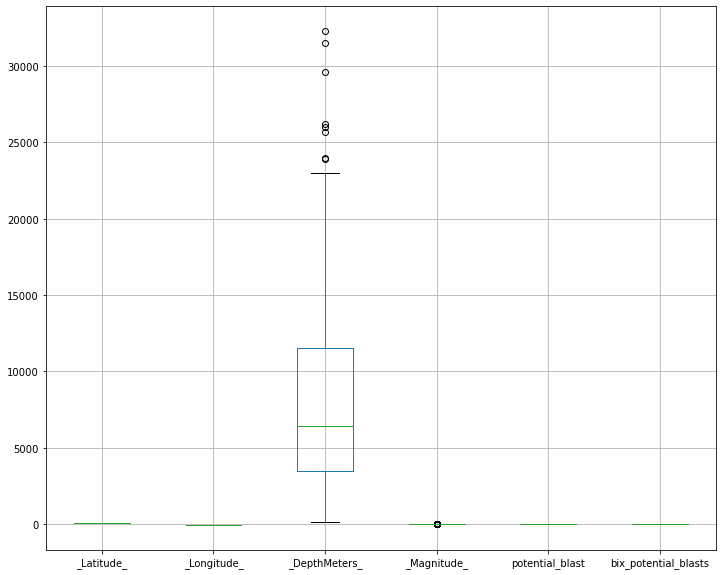

In [13]:
# check for outliers
quake_data.boxplot(figsize=(12,10))

The dataset clearly has outliers on the column "_DepthMeters_".

In [14]:
# dealing with outliers
def check_deal_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print('Lower bound: ', lower_bound)
    print('Upper bound: ', upper_bound)
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print('Number of outliers: ',outliers)
    percentage_outliers = round(df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]/df.shape[0] * 100, 2)
    print('Percentage of outliers: ', percentage_outliers, '%')

    values_within_bounds = df[(df[col] > lower_bound) & (df[col] < upper_bound)].shape[0]
    print('Number of values within bounds: ', values_within_bounds)

    percentage_within_bounds = round(df[(df[col] > lower_bound) & (df[col] < upper_bound)].shape[0]/df.shape[0] * 100, 2)
    print('Percentage of values within bounds: ', percentage_within_bounds, '%')

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

main_df = check_deal_outlier(quake_data, '_DepthMeters_')

Lower bound:  -8625.0
Upper bound:  23575.0
Number of outliers:  8
Percentage of outliers:  0.49 %
Number of values within bounds:  1639
Percentage of values within bounds:  99.51 %


Dealing with outliers in the "_DepthMeters_" column.

In [15]:
# check for statistical summary of the data
quake_data.describe()

,_Latitude_,_Longitude_,_DepthMeters_,_Magnitude_,potential_blast,bix_potential_blasts
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7561.554341,2.375823,0.621129,0.746812
std,2.410973,3.192442,5206.616854,0.454489,0.485253,0.434970
min,37.007700,-82.881000,100.000000,0.000000,0.000000,0.000000
25%,37.902400,-81.694150,3450.000000,2.100000,0.000000,0.000000
50%,38.477800,-80.831400,6400.000000,2.400000,1.000000,1.000000
75%,41.467200,-75.934050,11500.000000,2.600000,1.000000,1.000000
max,45.300900,-73.063400,32300.000000,5.200000,1.000000,1.000000


In [16]:
quake_data.dtypes

_EventID_                object
_Latitude_              float64
_Longitude_             float64
_DepthMeters_             int64
_Contributor_            object
_MagType_                object
_Magnitude_             float64
_EventLocationName_      object
_Time_                   object
ts                       object
potential_blast           int64
bix_potential_blasts      int64
dtype: object

In [17]:
quake_data.drop('_EventID_', axis=1, inplace=True)

In [18]:
# converting the data types to the appropriate data types
quake_data['Date'] = pd.to_datetime(quake_data['_Time_'])
quake_data['_MagType_'] = quake_data['_MagType_'].astype('category')
quake_data['_EventLocationName_'] = quake_data['_EventLocationName_'].astype('category')
quake_data['_Contributor_'] = quake_data['_Contributor_'].astype('category')


Converting the column "_Time_" to datetime format and the column "_MagType_" to categorical format.

In [19]:
quake_data.rename(columns={'_Time_':'Time', '_Latitude_':'Latitude', '_Longitude_':'Longitude', '_DepthMeters_':'DepthMeters','_Magnitude_':'Magnitude', 
'_MagType_':'MagType','_Contributor_':'Contributors','_EventLocationName_':'EventLocationName','_EventID_':'EventID'}, inplace=True)

In [20]:
quake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Latitude              1647 non-null   float64 
 1   Longitude             1647 non-null   float64 
 2   DepthMeters           1647 non-null   int64   
 3   Contributors          1647 non-null   category
 4   MagType               1647 non-null   category
 5   Magnitude             1647 non-null   float64 
 6   EventLocationName     1647 non-null   category
 7   Time                  1647 non-null   object  
 8   ts                    1647 non-null   object  
 9   potential_blast       1647 non-null   int64   
 10  bix_potential_blasts  1647 non-null   int64   
 11  Date                  1647 non-null   object  
dtypes: category(3), float64(3), int64(3), object(3)
memory usage: 126.3+ KB


##  Exploratory Data Analysis

In [21]:
sns.set_style('darkgrid')

In [22]:
quake_data.MagType.value_counts()

ML      1280
md       109
ml       108
mblg      96
Ml        18
mb        14
lg        11
Md         3
mwr        3
MbLg       2
mwc        2
Mw         1
Name: MagType, dtype: int64

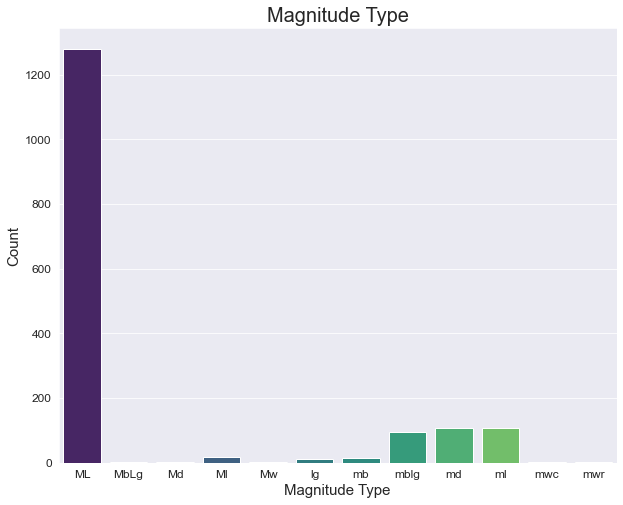

In [23]:
fig , ax = plt.subplots(figsize=(10,8))
sns.countplot(quake_data.MagType, palette='viridis')
plt.title('Magnitude Type', fontsize=20)
plt.xlabel('Magnitude Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

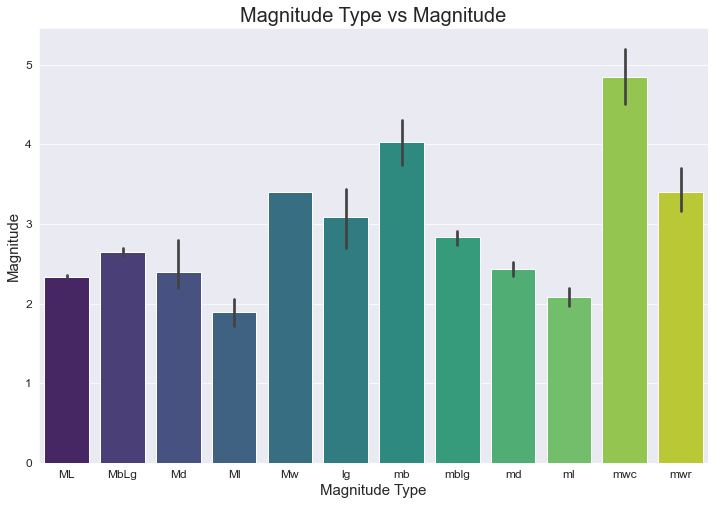

In [24]:
# Magnitude Type vs Magnitude
fig , ax = plt.subplots(figsize=(12,8))
sns.barplot(quake_data.MagType, quake_data.Magnitude, palette='viridis')
plt.title('Magnitude Type vs Magnitude', fontsize=20)
plt.xlabel('Magnitude Type', fontsize=15)
plt.ylabel('Magnitude', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

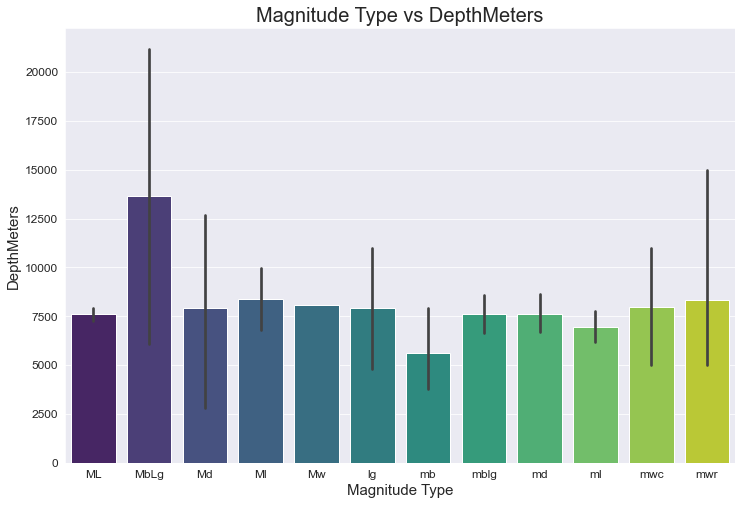

In [25]:
# Magnitude Type vs DepthMeters
fig , ax = plt.subplots(figsize=(12,8))
sns.barplot(quake_data.MagType, quake_data.DepthMeters, palette='viridis')
plt.title('Magnitude Type vs DepthMeters', fontsize=20)
plt.xlabel('Magnitude Type', fontsize=15)
plt.ylabel('DepthMeters', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
quake_data.columns

Index(['Latitude', 'Longitude', 'DepthMeters', 'Contributors', 'MagType',
       'Magnitude', 'EventLocationName', 'Time', 'ts', 'potential_blast',
       'bix_potential_blasts', 'Date'],
      dtype='object')

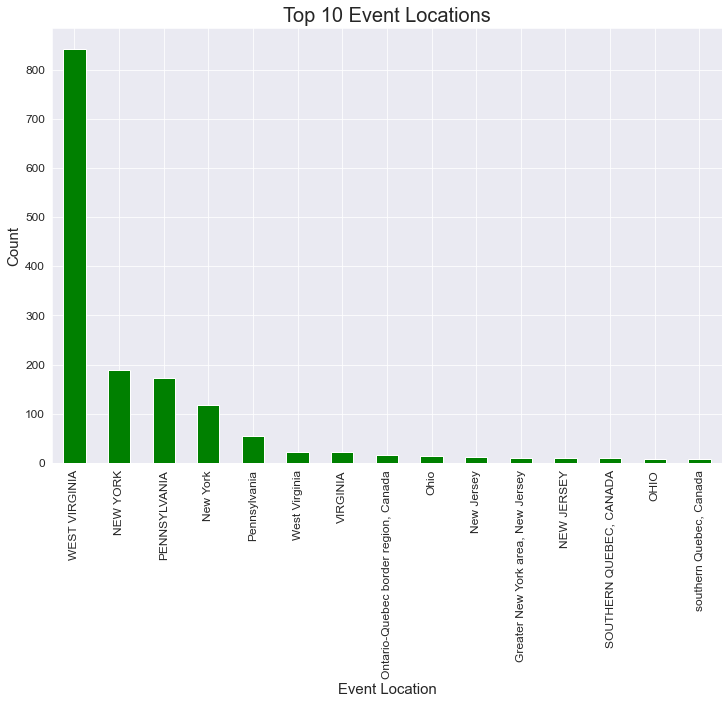

In [27]:
# top 10 event locations
quake_data['EventLocationName'].value_counts().head(10)

# plot of the top 10 event locations
fig , ax = plt.subplots(figsize=(12,8))
quake_data['EventLocationName'].value_counts().head(15).plot(kind='bar', ax=ax, color='green')
plt.title('Top 10 Event Locations', fontsize=20)
plt.xlabel('Event Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

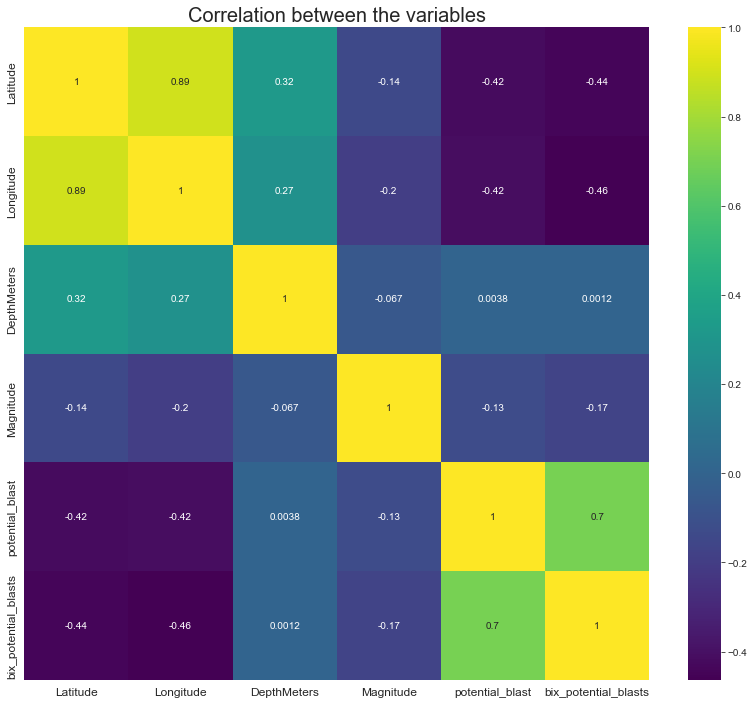

In [28]:
# heatmap of the correlation between the variables
plt.figure(figsize=(14,12))
sns.heatmap(quake_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation between the variables', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [29]:
# ! pip install plotly

In [30]:
from plotly.graph_objs import Scattergeo,Layout
from plotly import offline

In [31]:
# map of the earthquakes by magnitude
data = [{
    'type': 'Scattergeo',
    'lon':list(quake_data['Longitude']),
    'lat':list(quake_data['Latitude']),
    'marker': {
         'size':[5*mag for mag in quake_data.Magnitude],
         'color':quake_data.Magnitude,
         'colorscale':'Reds',
         'reversescale':True,
         'colorbar':{'title':'Magnitude'},
            
    },
}]

data = [Scattergeo(lon=quake_data['Longitude'], lat=quake_data['Latitude'])]
my_layout = Layout(title='Global Earthquakes')

fig = {'data':data , 'layout':my_layout}
offline.plot(fig, filename='global_earthquakes.html',)
#offline.plot(fig, filename='global_earthquakes.html',image='png', image_width=2000, image_height=1000)


'global_earthquakes.html'

## Feature Engineering

### 1. Converting Categorical columns to numerical

In [32]:
quake_data.dtypes

Latitude                 float64
Longitude                float64
DepthMeters                int64
Contributors            category
MagType                 category
Magnitude                float64
EventLocationName       category
Time                      object
ts                        object
potential_blast            int64
bix_potential_blasts       int64
Date                      object
dtype: object

In [33]:
# label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

def label_encoder(df, col):
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    return df

In [34]:
# check the dataframe for categorical variables and label encode them 
def check_deal_categorical(df):
    categorical = df.select_dtypes(include=['category']).columns
    for col in categorical:
        df = label_encoder(df, col)
    return df.head(5)

In [35]:
check_deal_categorical(quake_data)

,Latitude,Longitude,DepthMeters,Contributors,MagType,Magnitude,EventLocationName,Time,ts,potential_blast,bix_potential_blasts,Date
0,39.644,-75.483,5000,1,8,2.8,101,2009-07-01T13:44:43.380Z,2009/07/01 09:44:43-04,0,0,2009-07-01 13:44:43.380000+00:00
1,37.379,-80.746,11500,1,7,2.8,114,2009-07-04T12:24:43.460Z,2009/07/04 08:24:43-04,0,0,2009-07-04 12:24:43.460000+00:00
2,45.296,-73.475,18000,1,8,2.1,119,2009-07-08T10:22:11.430Z,2009/07/08 06:22:11-04,0,0,2009-07-08 10:22:11.430000+00:00
3,42.825,-78.239,5000,1,8,2.4,102,2009-09-23T03:45:59.900Z,2009/09/22 23:45:59-04,0,0,2009-09-23 03:45:59.900000+00:00
4,38.619,-80.909,100,1,7,3.4,114,2010-04-04T09:19:14.000Z,2010/04/04 05:19:14-04,0,0,2010-04-04 09:19:14+00:00


In [36]:
quake_data.dtypes

Latitude                float64
Longitude               float64
DepthMeters               int64
Contributors              int64
MagType                   int64
Magnitude               float64
EventLocationName         int64
Time                     object
ts                       object
potential_blast           int64
bix_potential_blasts      int64
Date                     object
dtype: object

In [37]:
quake_data.drop(['Date','Time','ts'], axis=1,inplace=True)

In [38]:
quake_data.head()

,Latitude,Longitude,DepthMeters,Contributors,MagType,Magnitude,EventLocationName,potential_blast,bix_potential_blasts
0,39.644,-75.483,5000,1,8,2.8,101,0,0
1,37.379,-80.746,11500,1,7,2.8,114,0,0
2,45.296,-73.475,18000,1,8,2.1,119,0,0
3,42.825,-78.239,5000,1,8,2.4,102,0,0
4,38.619,-80.909,100,1,7,3.4,114,0,0


In [39]:
quake_data.shape

(1647, 9)

#### 2. Feature Scaling

In [40]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

def feature_scaling(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [41]:
scaled_data = feature_scaling(quake_data)

In [42]:
scaled_data

array([[-0.10763906,  1.10454078, -0.49213   , ..., -0.24630818,
        -1.28039958, -1.71745168],
       [-1.04737924, -0.54454139,  0.7566606 , ...,  0.52301414,
        -1.28039958, -1.71745168],
       [ 2.23735497,  1.73371748,  2.0054512 , ...,  0.81890734,
        -1.28039958, -1.71745168],
       ...,
       [ 0.49632552,  0.2008826 , -0.8571611 , ...,  0.04958502,
         0.78100619,  0.58225801],
       [ 1.59625717,  1.53446775,  1.81332957, ..., -0.30548682,
         0.78100619,  0.58225801],
       [ 1.07693144,  1.61490085,  2.17836067, ..., -0.30548682,
         0.78100619,  0.58225801]])

#### 3. Feature Selection and Extraction

In [43]:
# feature selection 
from sklearn.feature_selection import SelectKBest

def feature_selection(df, target, k):
    selector = SelectKBest(k=k)
    selector.fit(df, target)
    return selector
    

In [44]:
feature_selection(scaled_data, quake_data.Magnitude, 8)

# show the selected features
selected_features = feature_selection(scaled_data, quake_data.Magnitude, 8).get_support(indices=True)
selected_features

# match the selected feature to features in the quake_data features
quake_data.columns[selected_features]


Index(['Latitude', 'Longitude', 'Contributors', 'MagType', 'Magnitude',
       'EventLocationName', 'potential_blast', 'bix_potential_blasts'],
      dtype='object')

In [45]:
# feture selection using random forest 
from sklearn.ensemble import RandomForestRegressor

def feature_selection_random_forest(df, target):
    selector = RandomForestRegressor(n_estimators=100, random_state=42)
    selector.fit(df, target)
    return selector.feature_importances_

feature_selection_random_forest(scaled_data, quake_data.Magnitude)

array([1.80430261e-04, 1.86376567e-04, 6.88005047e-04, 1.12737948e-06,
       1.68790212e-04, 9.98479481e-01, 2.95538288e-04, 1.07693558e-07,
       1.43913692e-07])

In [46]:
# match the selected feature to features in the quake_data features
quake_data.columns[feature_selection_random_forest(scaled_data, quake_data.Magnitude).argsort()[-7:]]

Index(['Contributors', 'MagType', 'Latitude', 'Longitude', 'EventLocationName',
       'DepthMeters', 'Magnitude'],
      dtype='object')

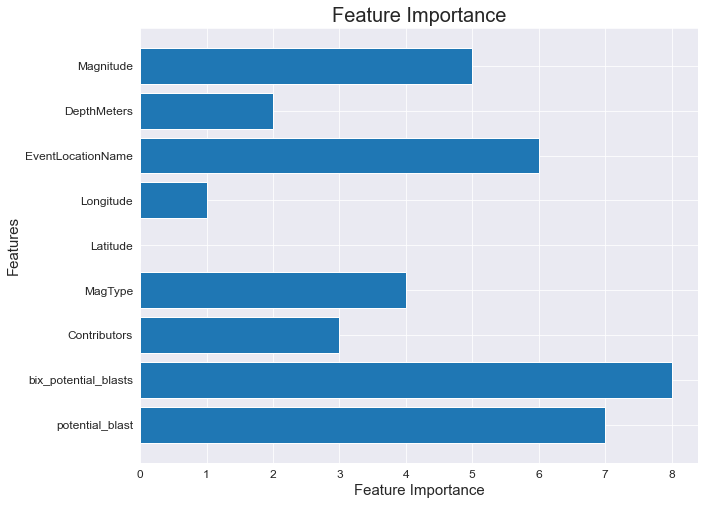

In [47]:
# plot the feature importance
plt.figure(figsize=(10,8))
plt.title('Feature Importance', fontsize=20)
plt.barh(quake_data.columns[feature_selection_random_forest(scaled_data, quake_data.Magnitude).argsort()[-9:]],
            feature_selection_random_forest(scaled_data, quake_data.Magnitude).argsort()[-9:])
plt.xlabel('Feature Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [48]:
# dropping the least important features
#quake_data.drop('Latitude', axis=1, inplace=True)

### Model Building

In [49]:
# splitting the data into train and test data 
from sklearn.model_selection import train_test_split

X = quake_data.drop('Magnitude', axis=1)
y = quake_data['Magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Baseline Model

#### 1. Logistic Regression

In [50]:
from sklearn.linear_model import LinearRegression

# linear regression model
def linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model1 = linear_regression(X_train, y_train)

In [51]:
def linear_regression_predict(model, X_test):
    return model.predict(X_test)

model1_predict = linear_regression_predict(model1, X_test)

In [52]:
def linear_evaluation(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R2 Score: ', r2_score(y_test, y_pred))

linear_evaluation(y_test, linear_regression_predict(linear_regression(X_train, y_train), X_test))

Mean Squared Error:  0.15642923205279355
R2 Score:  0.28354184694908


#### 2.Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

# decision tree model
def decision_tree(X_train, y_train):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    return model

model2 = decision_tree(X_train, y_train)

In [54]:
# decision tree model prediction
def decision_tree_predict(model, X_test):
    return model.predict(X_test)

model2_predict = decision_tree_predict(model2, X_test)

In [55]:
# decision tree model evaluation
def decision_tree_evaluation(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R2 Score: ', r2_score(y_test, y_pred))

decision_tree_evaluation(y_test, decision_tree_predict(decision_tree(X_train, y_train), X_test))

Mean Squared Error:  0.19837463592233007
R2 Score:  0.09142860704516798


The decision tree regressor better in terms of a lower mse than the base linear regression model ,however, it has a very low R2 score of 0.09

#### 3. Random Forest

In [56]:
# random forest model

from sklearn.ensemble import RandomForestRegressor

def random_forest(X_train, y_train):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    return model

model3 = random_forest(X_train, y_train)

In [57]:
# random forest model prediction
def random_forest_predict(model, X_test):
    return model.predict(X_test)

model3_predict = random_forest_predict(model3, X_test)

In [58]:
# random forest model evaluation
def random_forest_evaluation(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R2 Score: ', r2_score(y_test, y_pred))

random_forest_evaluation(y_test, random_forest_predict(random_forest(X_train, y_train), X_test))

Mean Squared Error:  0.10795286679577502
R2 Score:  0.5055674022937726


Since the Random forest has the lowest Mean Squared Error and the highest R2 score, it is the best model for this dataset.

In [59]:
# tuning the random forest model

from sklearn.model_selection import GridSearchCV

def random_forest_tuning(X_train, y_train):
    model = RandomForestRegressor()
    param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25, 30]}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

random_forest_tuning(X_train, y_train)

{'max_depth': 10, 'n_estimators': 400}

In [65]:
# random forest model with tuned parameters
def random_forest_tuned(X_train, y_train):
    model = RandomForestRegressor(n_estimators=400, max_depth=10)
    model.fit(X_train, y_train)
    return model

model4 = random_forest_tuned(X_train, y_train)

In [66]:
# random forest model prediction
def random_forest_tuned_predict(model, X_test):
    return model.predict(X_test)

In [67]:
# random forest model evaluation
def random_forest_tuned_evaluation(y_test, y_pred):
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('R2 Score: ', r2_score(y_test, y_pred))

random_forest_tuned_evaluation(y_test, random_forest_tuned_predict(random_forest_tuned(X_train, y_train), X_test))

Mean Squared Error:  0.10626815612640285
R2 Score:  0.5132835093075576


In [68]:
# cross validation 
from sklearn.model_selection import cross_val_score

def cross_validation(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return scores

cross_validation(random_forest_tuned(X_train, y_train), X, y)

array([-0.28059154, -0.13775686, -0.11749476, -0.09810906, -0.06565819,
       -0.06622948, -0.06591842, -0.08817389, -0.17786897, -0.09470738])

## Conclusion

### Saving the final model

In [69]:
# saving the model
import pickle

def save_model(model, filename):
    pickle.dump(model, open(filename, 'wb'))

save_model(random_forest_tuned(X_train, y_train), 'model.pkl')